<a href="https://colab.research.google.com/github/quarcs-lab/tutorial-classical-convergence/blob/master/R_classical_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Sigma and Beta Convergence Analysis in R: Using the REAT 2.1 Package

## How to run R conde in Google Colab?


Open this link in your browser to create a new notebook with R Kernel

https://colab.research.google.com/notebook#create=true&language=r

## Install and load libraries

In [2]:
install.packages("devtools")
library(devtools)
install_version("REAT", version = "2.1.1", repos = "http://cran.us.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rematch2’, ‘usethis’, ‘glue’


Loading required package: usethis


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("ConvergenceClubs")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘lmtest’, ‘sandwich’




In [0]:
library(REAT)

In [0]:
library(ConvergenceClubs)

In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load data

In [8]:
data(GDP)
GDP

Countries,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,⋯,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1731.1103,1748.3821,2119.6253,2119.4362,2148.0198,2263.1123,2269.6012,2121.0975,2205.3696,⋯,1022.0531,920.7470,939.6582,1029.1133,1047.1674,880.5576,478.1044,418.2312,525.8540,588.0761
Algeria,4280.1338,3830.3785,4621.2125,4425.8152,4043.5660,3987.8969,4343.4947,4276.6604,4436.8322,⋯,5227.7289,5324.4755,5513.4534,5457.3247,5508.1995,5610.9808,5753.1220,5726.0329,5723.2922,5993.0013
Antigua,5167.9331,4978.5376,5249.2337,5021.9220,5169.5753,4871.2570,4414.2645,4717.3538,4737.5272,⋯,12623.9680,12024.5090,12438.5510,12949.8130,13666.6970,14056.1520,14064.7400,14316.2950,15270.9160,15820.5420
Argentina,9739.7748,9947.7833,9945.6703,10179.4880,10591.2240,10363.5000,10106.8430,10503.8170,10092.5690,⋯,10967.8050,10573.1710,10910.5460,11604.9600,11932.8820,11586.6020,11331.9580,10690.7230,9561.1764,10172.0630
Australia,14672.8520,15080.5870,15364.9750,15898.5950,15617.8940,15834.0190,16248.4400,16365.1010,16878.1920,⋯,22007.7890,22648.2910,23271.2260,24010.6430,24950.2770,25658.2070,25834.5400,26528.3880,27119.4070,27871.5350
Austria,12689.6860,13290.6290,14057.6070,14720.4400,15217.6970,15183.4260,15891.8470,16717.6720,16446.1230,⋯,23265.2310,23590.1360,24023.9730,24488.4240,25338.8660,26112.9670,26999.7670,27190.5320,27346.7500,27566.9480
Bahamas,16856.3460,16749.6930,15789.8810,16641.6830,13588.8170,11358.3650,11701.4490,12483.2760,13965.2540,⋯,17737.4860,17111.2250,16741.5210,16624.0360,16705.8540,18425.0530,19088.0420,18533.1190,18377.3380,18381.1310
Bahrain,11834.0480,11683.3560,11544.8110,10784.8780,17751.5430,18689.8600,19705.9910,21461.0160,19649.8800,⋯,15801.3520,16906.1960,16865.3450,16889.0010,17048.2880,18054.5550,18652.1510,19093.7380,18882.9500,19560.6000
Barbados,11616.2250,12031.8810,12280.0370,12120.7130,12397.5890,11529.3450,11298.7420,11769.6780,12405.4590,⋯,13587.5170,14020.4790,14237.5180,14539.5660,15050.4670,15537.0870,16086.0000,15497.7560,15450.6720,15707.7090


## # Sigma convergence for two periods (ANOVA): 1970 and 2003 

In [9]:
sigma_anova_sd_log <- sigmaconv(
          GDP$Y1970,
          1970,
          GDP$Y2003,
          2003,
          sigma.measure = "sd",
          sigma.log = TRUE, # Fist take log of Y, and then do the analysis
          output.results = TRUE
          )

Sigma convergence for two periods (ANOVA) 
          Estimate   F value df1 df2    Pr (>F)
SD 1970  1.0877590        NA  NA  NA         NA
SD 2003  1.2602394        NA  NA  NA         NA
Quotient 0.8631368 0.7450052 151 151 0.07148669


## Sigma convergence for multiple periods (Trend regression)

In [10]:
sigma_trend_sd_log <- sigmaconv.t(
  GDP$Y1970,
  1970,
  GDP[3:35],
  2003,
  sigma.measure = "sd",
  sigma.log = TRUE, # Fist take log of x, and then do the
  output.results = TRUE
  )

Sigma convergence (Trend regression) 
              Estimate   Std. Error   t value     Pr(>|t|)
Intercept -9.437331398 0.7350746711 -12.83860 3.622446e-14
Time       0.005335467 0.0003700306  14.41899 1.502514e-15
Model summary 
           Estimate  F value df 1 df 2      Pr (>F)
R-Squared 0.8666151 207.9073    1   32 1.502514e-15


### Linear trend regression

`geom_smooth()` using formula 'y ~ x'



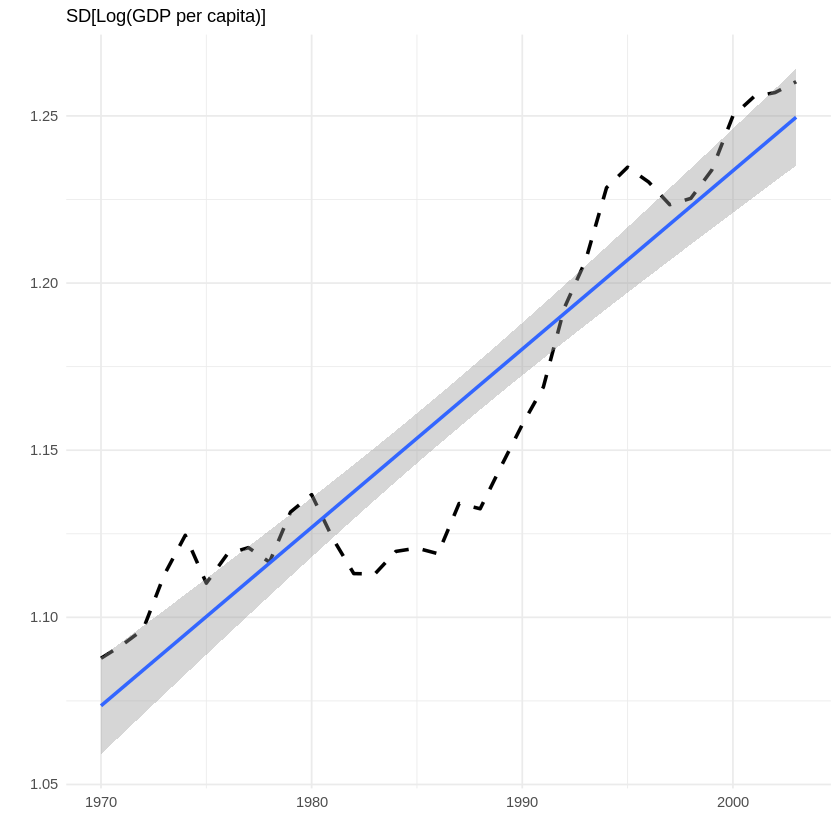

In [11]:
sigma_trend_sd_log[["sigma.trend"]] %>% 
  ggplot(aes(x = years, y = sigma.years)) +
  geom_line(size=1, linetype = "dashed") + 
  geom_smooth(method = lm) + 
  theme_minimal() +
  labs(subtitle = "SD[Log(GDP per capita)]",
       x = "",
       y = "")

### Non-linear trend regression

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



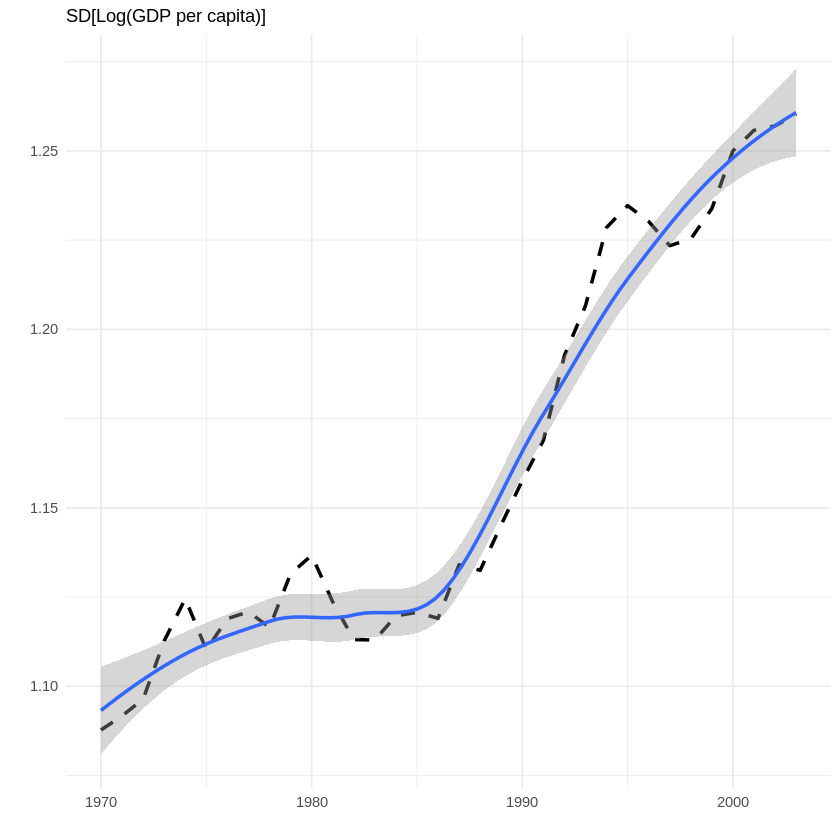

In [12]:
sigma_trend_sd_log[["sigma.trend"]] %>% 
  ggplot(aes(x = years, y = sigma.years)) +
  geom_line(size=1, linetype = "dashed") + 
  geom_smooth() + 
  theme_minimal() +
  labs(subtitle = "SD[Log(GDP per capita)]",
       x = "",
       y = "")

## Beta convergence: 1970-2003 period

Absolute Beta Convergence 
Model coefficients (Estimation method: OLS)
              Estimate Std. Error    t value Pr (>|t|)
Alpha     5.996684e-01 0.40368351  1.4854914 0.1395124
Beta     -1.259363e-02 0.04948409 -0.2544985 0.7994590
Lambda    3.840484e-04         NA         NA        NA
Halflife  1.804843e+03         NA         NA        NA
Model summary 
              Estimate    F value df 1 df 2  Pr (>F)
R-Squared 0.0004316102 0.06476948    1  150 0.799459


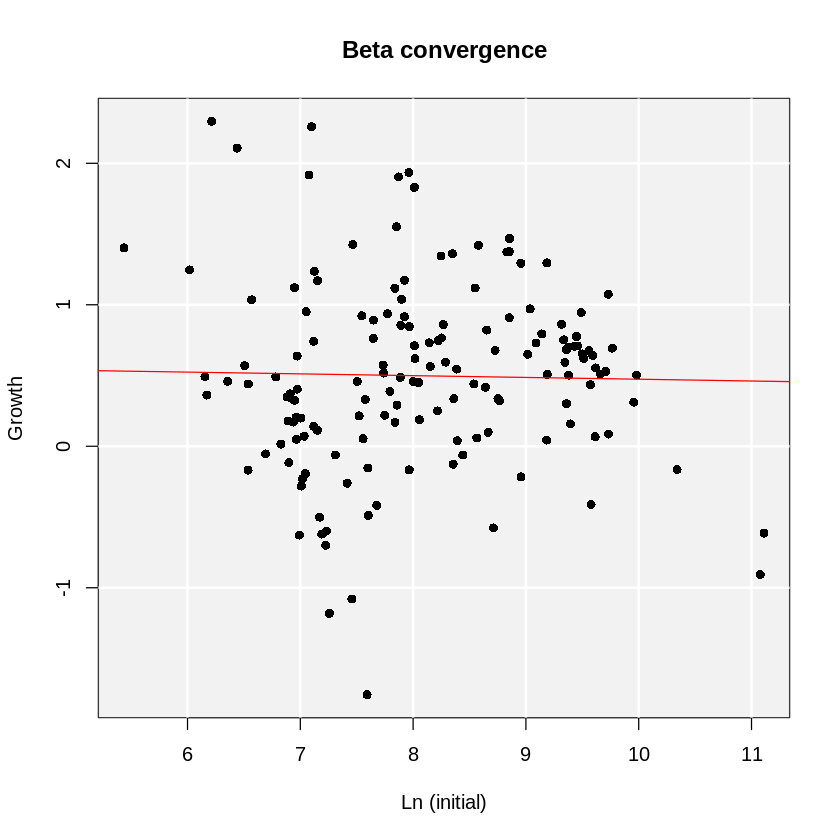

In [13]:
betaconv_ols <- betaconv.ols (GDP$Y1970,
              1970,
              GDP$Y2003,
              2003,
              conditions = NULL, 
              beta.plot = TRUE,
              beta.plotLine = TRUE, 
              beta.plotLineCol = "red", 
              beta.plotX = "Ln (initial)", 
              beta.plotY = "Growth", 
              beta.plotTitle = "Beta convergence", 
              beta.bgrid = TRUE, 
              beta.bgridType = "solid",
              output.results = TRUE)

### Linear beta-convergence regression

`geom_smooth()` using formula 'y ~ x'



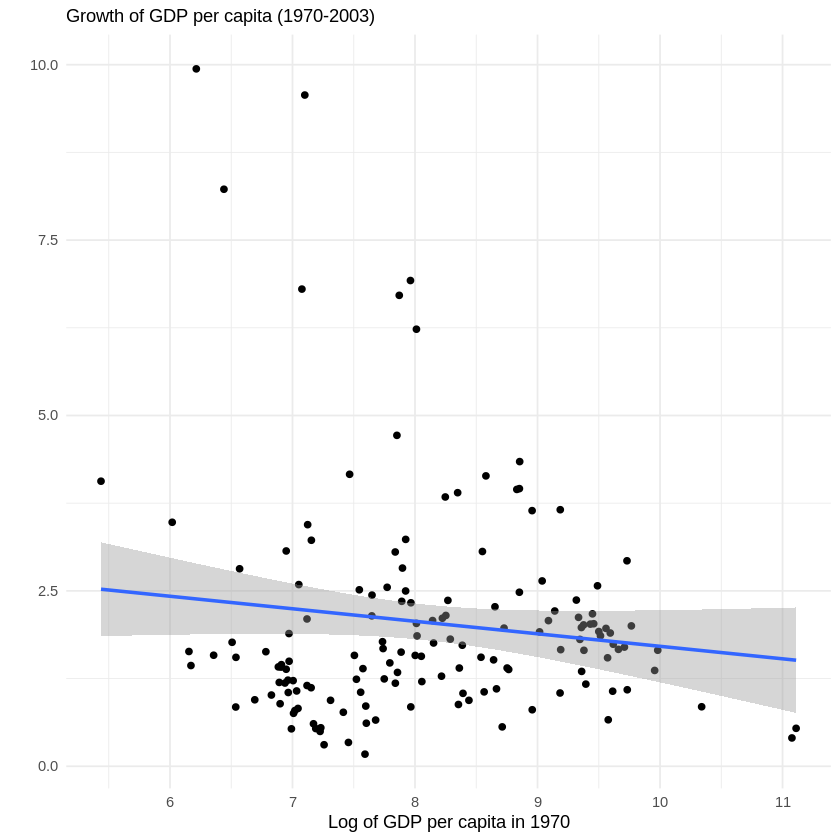

In [14]:
betaconv_ols[["regdata"]] %>% 
  ggplot(aes(x = ln_initial, y = growth)) +
  geom_point() +
  geom_smooth(method = lm) + 
  theme_minimal() +
  labs(subtitle = "Growth of GDP per capita (1970-2003)",
       x = "Log of GDP per capita in 1970",
       y = "")

### Non-linear beta-convergence regression

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



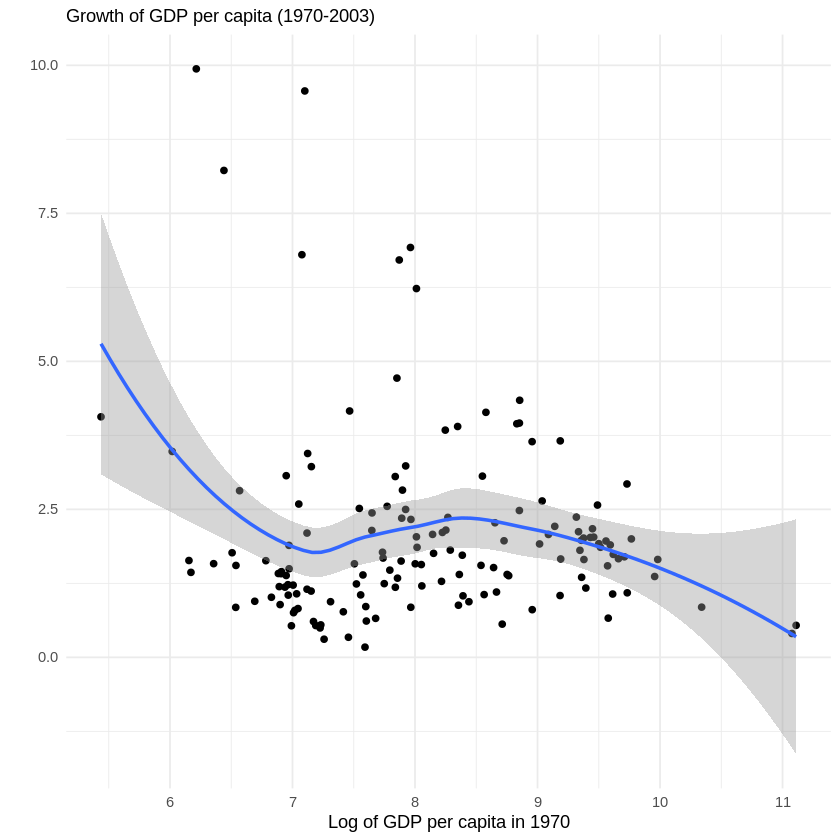

In [15]:
betaconv_ols[["regdata"]] %>% 
  ggplot(aes(x = ln_initial, y = growth)) +
  geom_point() +
  geom_smooth() + 
  theme_minimal() +
  labs(subtitle = "Growth of GDP per capita (1970-2003)",
       x = "Log of GDP per capita in 1970",
       y = "")